# Coursera Capstone Athens Project

## The Battle of Neighborhoods - Final Report

### Upload Libraries Required

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import json
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim

In [2]:
# Install folium conda and import module
!conda install -c conda-forge folium
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.0-py_0        conda-forge
    folium:          

# 1. Introduction Section :

## Discussion of the business problem

### 1.1 Scenario and Background

I just started working as an Application Support Engineer although my real passion is to find a job and work as a data scientist. I currently live within walking distance from "Megaro Mousikis metro station" near the center of Athens therefore I have access to good public transportation to work. Likewise, I enjoy many amenities in the neighborhood , such as international cousine restaurants, cafes, food shops and entertainment. Although you don' t really care about my personal life I have just recently started looking for a bigger house in order to live with my girlfriend and start a family. Although, I am very excited about it, I am a bit stressed towards the process to secure a comparable place to live in Athens, since there is a significant raise in rental prices within the last few years. Therefore, I decided to apply the skills I have learned during studying for the Coursera courses to explore ways to make sure my decision is factual and rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it will be rather rewarding doing it myself with the tools used so far.

### 1.2 Problem to be resolved:

The challenge to resolve is being able to find a rental apartment unit in Attica GR that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a rental unit subject to the following conditions:

- Apartment with min 2 bedrooms with monthly rent not to exceed 700 euro/month
- Unit located within walking distance (<= 1.5 km) from a subway metro station in Attica
- Area with amenities and venues similar to the ones described for current location ( See item 2.1)

### 1.3 Interested Audience:

I believe this is a relevant project for everyone considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case towards the development of Data Science skills.

# 2. Data Section:

## Description of the data and its sources that will be used to solve the problem

### 2.1 Data of Current Situation

I Currently reside in the neighborhood of 'Kolonaki' near Athens city center. Foursquare will be used to identify the venues around the area of residence which will be shown in Athens map displayed in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location.

### 2.2 Data Required to resolve the problem

In order to make a good choice of a similar apartment, the following data is required: List/Information of Attica neighborhoods with their geodata (latitude and longitude). List/Information of the subway metro stations with Geodata. Listed apartments for rent in Athens area with descriptions (number of bedrooms, apartment size, price, location). Venues and amenities in Athens neighborhoods (e.g. top 10).

### 2.3 Sources and manipulation

The list of Athens neighborhoods is scraped from Wikipedia link https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Athens and is passed to a list and then to the pandas DataFrame "df_neighborhoods" along with latitude and longitude retrieved from Nominatim. The sript used along with the dataframe are shown below.

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Athens")
soup = BeautifulSoup(res.content,'lxml')

li = soup.find_all('li')

neighborhoods = []

for h in li:
    a = h.find('a')
    if a is not None and 'title' in a.attrs:
        l = a.get('title')
    neighborhoods.append(l)

k = []
for address1 in neighborhoods[2:64]:
    address = address1 + ', Greece'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location is not None:
        t = address, location.latitude, location.longitude
        time.sleep(2)
        k.append(t)

df_neighborhoods = pd.DataFrame(k , columns = ['Neighborhood', 'Latitude', 'Longitude'])

print(df_neighborhoods.shape)
print(df_neighborhoods.head())

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


(47, 3)
                          Neighborhood   Latitude  Longitude
0    Agios Eleftherios, Athens, Greece  38.020044  23.731724
1  Agios Panteleimonas, Athens, Greece  37.996564  23.726957
2            Akadimia Platonos, Greece  37.989357  23.711217
3             Akadimia, Athens, Greece  37.980285  23.734528
4                   Anafiotika, Greece  37.972351  23.728043


A list of Athens subway metro stations was scraped once again from Wikipedia (https://en.wikipedia.org/wiki/List_of_Athens_Metro_stations). The geolocation was obtained again using Nominatim and passed to the pandas DataFrame "df_stations".

In [4]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_Athens_Metro_stations")
soup = BeautifulSoup(res.content,'lxml')

table = soup.find_all('td')
#print(table)
stations = []
for h in table:
    a = h.find('a')
    if a is not None and 'title' in a.attrs:
        l = a.get('title')
        if 'station' in l:
            l = l[:l.find("station")] + 'station'
            stations.append(l)

k = []
for address in stations:
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location is not None:
        t = address, location.latitude, location.longitude
        time.sleep(2)
        k.append(t)

df_stations = pd.DataFrame(k , columns = ['Station', 'Latitude', 'Longitude'])
print(df_stations.shape)
print(df_stations.head())

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


(49, 3)
                         Station   Latitude  Longitude
0         Nerantziotissa station  38.045158  23.792984
1                Piraeus station  37.943159  23.647059
2         Elliniko metro station  37.907554  23.737044
3   Agia Paraskevi metro station  38.020815  23.816783
4  Agios Dimitrios metro station  37.946833  23.737825


A list of places for rent was collected by web-browsing nepstick site: https://www.nestpick.com/athens/ working as search engine for rental apartments, retrieving data from different real etate sites. Afterwards data are passed to a DataFrame with the following columns ['name', 'category', 'normalized_price', 'number_of_bedrooms', 'apartment_size', 'latitude', 'longitude']. The loop algorithms used are shown in the execution of data in section 3.0. "Great_circle" function from geolocator was used to calculate distances between two points, as in this case to calculate average rent price for units around each subway station and at 1.5 km radius. Foursquare is used to find the avenues at Athens neighborhoods in general and a cluster is created to later be able to search for the venues depending on the location shown.

### 2.4 How the data will be used to solve the problem

The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Athens neighborhoods and clustered in groups. Use foursquare and geopy data to map the location of subway metro stations, separately and on top of the above clustered map in order to be able to identify the venues and amenities near each metro station, or explore each subway location separately. Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. Create a map that depicts, for instance, the average rental price per square ft, around a radius of 1.5 km around each subway station. I will be able to quickly point to the popups to know the relative price per subway area.

# 3. Methodology section:  

This section represents the main component of the report where the data are gathered and prepared for analysis. The tools described are used here and the Notebook cells indicate the execution of steps.  

## The analysis and the stragegy:

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to the current location. This visual approach and maps with popup labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these data and its mapping will allow to answer the key questions to make a decision:

- What is the cost of available rental places that meet the demands?
- What is the cost of rent around 1.5 km radius from each subway metro station?
- What is the area of Athens with best rental pricing that meets criteria established?
- What is the distance from work place and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Athens neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

# METHODOLOY EXECUTION - Mapping Data

### Athens Map - Current residence and venues in neighborhood

In [5]:
# For comparison to future renting place
# Monis Petraki, Athens, Greece
address = 'Monis Petraki, Athens, Greece'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of current residence home are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of current residence home are 37.9787579, 23.7505167.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [6]:
neighborhood_latitude = 37.9787579
neighborhood_longitude = 23.7505167

### Dial FourSquare to find venues around current residence

In [69]:
#@ hidden_cell
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # Foursquare Secret
VERSION = '20200301' # Foursquare API version

In [70]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&client_secret=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX&v=20200301&ll=37.9787579,23.7505167&radius=500&limit=100'

In [9]:
# results display is hidden for report simplification 
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5c0d5560ba08001bd9d2d3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ilisia',
  'headerFullLocation': 'Ilisia, Athens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 98,
  'suggestedBounds': {'ne': {'lat': 37.9832579045, 'lng': 23.756214975201765},
   'sw': {'lat': 37.974257895499996, 'lng': 23.744818424798233}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5679c79c498e5a11fca9e97e',
       'name': 'Simul',
       'location': {'address': 'Υψηλάντου 63',
        'lat': 37.9778216565937,
        'lng': 23.75048216011643,
        'labeledLatLngs': [{'label': 'display',
          'lat': 37.9778216565937,
          'lng':

In [10]:
# function that extracts the category of the venue - borrow from the Foursquare lab
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
CRnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
CRnearby_venues = CRnearby_venues.loc[:, filtered_columns]
# filter the category for each row
CRnearby_venues['venue.categories'] = CRnearby_venues.apply(get_category_type, axis=1)
# clean columns
CRnearby_venues.columns = [col.split(".")[-1] for col in CRnearby_venues.columns]

CRnearby_venues.shape

(98, 4)

In [12]:
# Venues near current residence place
CRnearby_venues.head(10)

,name,categories,lat,lng
0,Simul,Modern European Restaurant,37.977822,23.750482
1,Hopper Cafe,Café,37.978198,23.752847
2,CV Distiller,Whisky Bar,37.976270,23.751681
3,Hilton Athens,Hotel,37.976058,23.750193
4,Aethrion,Hotel Bar,37.976264,23.750075
5,Galaxy Restaurant & Bar,Hotel Bar,37.976071,23.750546
6,Milos Restaurant,Seafood Restaurant,37.976016,23.750012
7,Ιλίσια - Ντενίση,Theater,37.977877,23.752804
8,Hiltonia Spa,Spa,37.975773,23.750279
9,L'Abreuvoir,French Restaurant,37.979939,23.747093


### Map of current residence place with venues in Neighborhood - for reference

In [62]:
# create map of current residence using latitude and longitude values
map_sg = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(CRnearby_venues['lat'], CRnearby_venues['lng'], CRnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

## ATHENS NEIGHBORHOODS - DATA AND MAPPING

### Explore Neighborhoods in Athens

Let's create a function to explore venues for all the neighborhoods in Athens.

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Here is the code to run the above function on each neighborhood and create a new dataframe called athens_venues.

In [15]:
athens_venues = getNearbyVenues(names = df_neighborhoods['Neighborhood'],
                                   latitudes = df_neighborhoods['Latitude'],
                                   longitudes = df_neighborhoods['Longitude']
                                  )

Agios Eleftherios, Athens, Greece
Agios Panteleimonas, Athens, Greece
Akadimia Platonos, Greece
Akadimia, Athens, Greece
Anafiotika, Greece
Ano Petralona, Greece
Asteroskopeio, Greece
Attiki, Athens, Greece
Elaionas, Greece
Ellinoroson, Greece
Evangelismos, Athens, Greece
Exarcheia, Greece
Gazi, Athens, Greece
Goudi, Greece
Gouva, Athens, Greece
Gyzi, Greece
Ilisia, Athens, Greece
Kallimarmaro, Greece
Kallimarmaro, Athens, Greece
Kerameikos, Greece
Kolokynthou, Greece
Kolonaki, Greece
Kolonos, Greece
Koukaki, Greece
Kountouriotika, Greece
Kypseli, Athens, Greece
Makrygianni, Athens, Greece
Metaxourgeio, Greece
Mets, Athens, Greece
Monastiraki, Greece
Mount Lycabettus, Greece
Nea Filothei, Greece
Neos Kosmos, Athens, Greece
Omonoia, Athens, Greece
Pangrati, Greece
Patisia, Greece
Pedion tou Areos, Greece
Petralona, Greece
Philopappou, Greece
Plaka, Greece
Polygono, Athens, Greece
Profitis Ilias, Athens, Greece
Rouf, Athens, Greece
Sepolia, Greece
Skouze Hill, Greece
Thiseio, Greece
Trei

Let's check the size of the resulting dataframe.

In [16]:
print(athens_venues.shape)
athens_venues.head()

(2233, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,Κοσμικόν,38.019532,23.731832,Dessert Shop
1,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,Strange Fruit,38.019933,23.735569,Bar
2,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,Coffee Island,38.020038,23.731612,Coffee Shop
3,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,Το Μανταλάκι,38.020443,23.732895,Kafenio
4,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,Μαγικό Φίλτρο,38.018366,23.728017,Café


Let's check how many venues were returned for each neighborhood.

In [17]:
athens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Agios Eleftherios, Athens, Greece",40,40,40,40,40,40
"Agios Panteleimonas, Athens, Greece",41,41,41,41,41,41
"Akadimia Platonos, Greece",23,23,23,23,23,23
"Akadimia, Athens, Greece",100,100,100,100,100,100
"Anafiotika, Greece",100,100,100,100,100,100
"Ano Petralona, Greece",31,31,31,31,31,31
"Asteroskopeio, Greece",54,54,54,54,54,54
"Attiki, Athens, Greece",14,14,14,14,14,14
"Ellinoroson, Greece",70,70,70,70,70,70


Let's find out how many unique categories can be curated from all the returned venues.

In [18]:
print('There are {} uniques categories.'.format(len(athens_venues['Venue Category'].unique())))

There are 222 uniques categories.


### Analyze Each Neighborhood

In [19]:
# one hot encoding
athens_onehot = pd.get_dummies(athens_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
athens_onehot['Neighborhood'] = athens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [athens_onehot.columns[-1]] + list(athens_onehot.columns[:-1])
athens_onehot = athens_onehot[fixed_columns]

athens_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,...,Vacation Rental,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Agios Eleftherios, Athens, Greece",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Agios Eleftherios, Athens, Greece",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Agios Eleftherios, Athens, Greece",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Agios Eleftherios, Athens, Greece",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Agios Eleftherios, Athens, Greece",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [20]:
athens_onehot.shape

(2233, 223)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [21]:
athens_grouped = athens_onehot.groupby('Neighborhood').mean().reset_index()
athens_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,...,Vacation Rental,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Agios Eleftherios, Athens, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,"Agios Panteleimonas, Athens, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,"Akadimia Platonos, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,"Akadimia, Athens, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000
4,"Anafiotika, Greece",0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.010000
5,"Ano Petralona, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,"Asteroskopeio, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.00,0.000000
7,"Attiki, Athens, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
8,"Ellinoroson, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.014286
9,"Exarcheia, Greece",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.00,0.035294,0.000000,0.000000,0.000000,0.035294,0.011765,0.00,0.000000


Let's confirm the new size.

In [22]:
athens_grouped.shape

(42, 223)

Let's print each neighborhood along with the top 5 most common venues.

In [23]:
num_top_venues = 5

for hood in athens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = athens_grouped[athens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agios Eleftherios, Athens, Greece----
          venue  freq
0           Bar  0.15
1          Café  0.12
2  Dessert Shop  0.08
3   Coffee Shop  0.08
4      Creperie  0.08


----Agios Panteleimonas, Athens, Greece----
           venue  freq
0           Café  0.20
1    Supermarket  0.05
2  Movie Theater  0.05
3          Hotel  0.05
4        Theater  0.05


----Akadimia Platonos, Greece----
              venue  freq
0       Coffee Shop  0.13
1  Greek Restaurant  0.09
2       Supermarket  0.09
3             Plaza  0.09
4     Souvlaki Shop  0.04


----Akadimia, Athens, Greece----
          venue  freq
0           Bar  0.12
1          Café  0.10
2  Cocktail Bar  0.09
3   Coffee Shop  0.07
4       Theater  0.05


----Anafiotika, Greece----
              venue  freq
0     Historic Site  0.11
1             Hotel  0.09
2              Café  0.07
3  Greek Restaurant  0.07
4               Bar  0.05


----Ano Petralona, Greece----
              venue  freq
0              Café  0.16
1   Meze Resta

Let's put that into a pandas dataframe.
  
First, let's write a function to sort the venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = athens_grouped['Neighborhood']

for ind in np.arange(athens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(athens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens, Greece",Bar,Café,Coffee Shop,Dessert Shop,Creperie,Bakery,Supermarket,Souvlaki Shop,Greek Restaurant,Kafenio
1,"Agios Panteleimonas, Athens, Greece",Café,Hotel,Movie Theater,Bakery,Theater,Supermarket,Food & Drink Shop,Music Venue,Coffee Shop,Pizza Place
2,"Akadimia Platonos, Greece",Coffee Shop,Supermarket,Plaza,Greek Restaurant,Spa,Hardware Store,Souvlaki Shop,Dessert Shop,Sandwich Place,Grocery Store
3,"Akadimia, Athens, Greece",Bar,Café,Cocktail Bar,Coffee Shop,Theater,Bookstore,Comfort Food Restaurant,Souvlaki Shop,Jewelry Store,Gourmet Shop
4,"Anafiotika, Greece",Historic Site,Hotel,Greek Restaurant,Café,Bar,Wine Bar,Plaza,Ice Cream Shop,Taverna,Gift Shop


### Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [26]:
# set number of clusters
kclusters = 5

athens_grouped_clustering = athens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(athens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 4, 4, 4, 4, 0, 0, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge neighborhoods_venues_sorted with df_neighborhoods to add latitude/longitude for each neighborhood
df_neighborhoods = df_neighborhoods.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [28]:
# Drop rows with NaN elements and convert Cluster Labels to int
df_neighborhoods.dropna(inplace=True)
df_neighborhoods['Cluster Labels'] = df_neighborhoods['Cluster Labels'].apply(np.int)
df_neighborhoods

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,4,Bar,Café,Coffee Shop,Dessert Shop,Creperie,Bakery,Supermarket,Souvlaki Shop,Greek Restaurant,Kafenio
1,"Agios Panteleimonas, Athens, Greece",37.996564,23.726957,0,Café,Hotel,Movie Theater,Bakery,Theater,Supermarket,Food & Drink Shop,Music Venue,Coffee Shop,Pizza Place
2,"Akadimia Platonos, Greece",37.989357,23.711217,0,Coffee Shop,Supermarket,Plaza,Greek Restaurant,Spa,Hardware Store,Souvlaki Shop,Dessert Shop,Sandwich Place,Grocery Store
3,"Akadimia, Athens, Greece",37.980285,23.734528,4,Bar,Café,Cocktail Bar,Coffee Shop,Theater,Bookstore,Comfort Food Restaurant,Souvlaki Shop,Jewelry Store,Gourmet Shop
4,"Anafiotika, Greece",37.972351,23.728043,4,Historic Site,Hotel,Greek Restaurant,Café,Bar,Wine Bar,Plaza,Ice Cream Shop,Taverna,Gift Shop
5,"Ano Petralona, Greece",37.970467,23.712938,4,Café,Cocktail Bar,Meze Restaurant,Coffee Shop,Pie Shop,Greek Restaurant,Bar,Supermarket,Taverna,Thai Restaurant
6,"Asteroskopeio, Greece",37.973125,23.719985,4,Greek Restaurant,Historic Site,Café,Meze Restaurant,Mediterranean Restaurant,Park,Bar,Bakery,Coffee Shop,Record Shop
7,"Attiki, Athens, Greece",37.999539,23.722840,0,Greek Restaurant,Café,Snack Place,Music Venue,Souvlaki Shop,Theater,Tsipouro Restaurant,Brewery,Donut Shop,Bakery
9,"Ellinoroson, Greece",37.997683,23.774666,0,Café,Dessert Shop,Coffee Shop,Souvlaki Shop,Seafood Restaurant,Supermarket,Bakery,Gym,Greek Restaurant,Italian Restaurant
11,"Exarcheia, Greece",37.986653,23.734839,4,Bar,Café,Coffee Shop,Greek Restaurant,Wine Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Souvlaki Shop,Cretan Restaurant,Plaza


Finally, let's visualize the resulting clusters.

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_neighborhoods['Latitude'], df_neighborhoods['Longitude'], df_neighborhoods['Neighborhood'], df_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Map of Athens places for rent

The data of the rental houses are directly by scraping Nepstick site along with the latitude and longitude of each house.

In [30]:
import requests
import pandas as pd

# Start with an empty list
total_results = []

# Loop through from pages 1 to 40
for page_num in range(1, 40):
    # Build the URL and download the results
    url = "https://www.nestpick.com/search/api/?city=athens&referrer=city-page&order=relevance&page=" + str(page_num) + "&type=apartment"
    print("Downloading", url)
    response = requests.get(url)
    data = response.json()
    total_results = total_results + data['items']


print("We have", len(total_results), "total results")

ath_rent = pd.DataFrame(total_results, columns=['name', 'category', 'normalized_price', 'number_of_bedrooms', 'apartment_size', 'latitude', 'longitude'])
ath_rent

We have 616 total results


,name,category,normalized_price,number_of_bedrooms,apartment_size,latitude,longitude
0,"Apartment in Ipeirou, Athens",apartment,400,1,50,37.99054,23.72816
1,"Apartment in Marni, Athens",apartment,700,1,35,37.9881,23.72798
2,Athens Center Omonoia Marni Apt. No8 AMA(0000000),apartment,700,1,0,37.9880588,23.7280228
3,Three bedroom flat,apartment,1780,3,100,37.8642788520307,23.760392357234
4,Artemidos,apartment,1250,3,95,38.008945,23.8281201
5,"Apartment in Poulopoulou I., Athens",apartment,1200,2,98,37.9763,23.71804
6,Two bedroom flat,apartment,1100,2,92,37.9297685344969,23.6883869651215
7,Modern 1BD Apartment close to the Acropolis Mu...,apartment,1670,1,70,37.96714,23.729073
8,Athens Green Apartments - Garden delight 1,apartment,821,1,25,37.968762,23.742683
9,4000 Apartment 2 bedrooms in Athens,apartment,4000,2,104,37.9785807,23.7388047


## Athens apartment rent price statistics

Now the ath_rent dataframe columns should be casted to numbers and columns with 0 values will be dropped.

In [33]:
ath_rent['normalized_price'] = ath_rent['normalized_price'].apply(np.float)
ath_rent['apartment_size'] = ath_rent['apartment_size'].apply(np.int)

columns=['normalized_price', 'number_of_bedrooms', 'apartment_size', 'latitude', 'longitude']
ath_rent = ath_rent.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0)
ath_rent = ath_rent.reset_index()

ath_rent

,name,category,normalized_price,number_of_bedrooms,apartment_size,latitude,longitude
0,"Apartment in Ipeirou, Athens",apartment,400.0,1,50.0,37.99054,23.72816
1,"Apartment in Marni, Athens",apartment,700.0,1,35.0,37.9881,23.72798
2,Three bedroom flat,apartment,1780.0,3,100.0,37.8642788520307,23.760392357234
3,Artemidos,apartment,1250.0,3,95.0,38.008945,23.8281201
4,"Apartment in Poulopoulou I., Athens",apartment,1200.0,2,98.0,37.9763,23.71804
5,Two bedroom flat,apartment,1100.0,2,92.0,37.9297685344969,23.6883869651215
6,Modern 1BD Apartment close to the Acropolis Mu...,apartment,1670.0,1,70.0,37.96714,23.729073
7,Athens Green Apartments - Garden delight 1,apartment,821.0,1,25.0,37.968762,23.742683
8,4000 Apartment 2 bedrooms in Athens,apartment,4000.0,2,104.0,37.9785807,23.7388047
9,Lamachou,apartment,1600.0,2,115.0,37.9731887,23.7333441


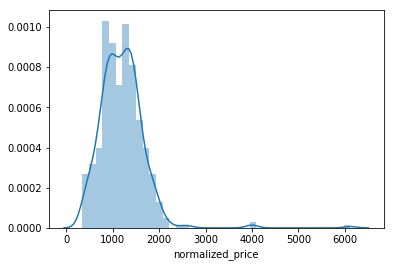

In [35]:
import seaborn as sns
sns.distplot(ath_rent['normalized_price'])

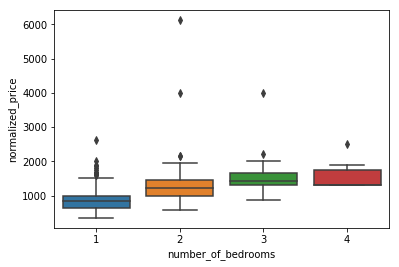

In [36]:
sns.boxplot(x ='number_of_bedrooms', y = 'normalized_price', data = ath_rent)

## Map of Athens apartments for rent

The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated.

In [64]:
# create map of Athens using latitude and longitude values from Nominatim
latitude= 37.983810
longitude= 23.727539

map_athens_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(ath_rent['latitude'], ath_rent['longitude'],'$ ' + ath_rent['normalized_price'].astype(str)+ ',  '+ ath_rent['name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_athens_rent) 
    

map_athens_rent

## Map of Athens showing the places for rent and the cluster of venues

Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.  

This is an insightful way to explore rental possibilites.

In [65]:
# create map of Athens using latitude and longitude values from Nominatim
latitude= 37.983810
longitude= 23.727539

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_neighborhoods['Latitude'], df_neighborhoods['Longitude'], df_neighborhoods['Neighborhood'], df_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(ath_rent['latitude'], ath_rent['longitude'],'$ ' + ath_rent['normalized_price'].astype(str)+ ath_rent['name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)
    
map_clusters2

## Now one can explore a particular rental place and its venues in detail

In the map above, examination of appartments with rental place below 700/month is straightforwad while knowing the venues around it.  
We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [44]:
## kk is the cluster number to explore
kk = 0
df_neighborhoods.loc[df_neighborhoods['Cluster Labels'] == kk, df_neighborhoods.columns[[1] + list(range(5, df_neighborhoods.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,37.996564,Hotel,Movie Theater,Bakery,Theater,Supermarket,Food & Drink Shop,Music Venue,Coffee Shop,Pizza Place
2,37.989357,Supermarket,Plaza,Greek Restaurant,Spa,Hardware Store,Souvlaki Shop,Dessert Shop,Sandwich Place,Grocery Store
7,37.999539,Café,Snack Place,Music Venue,Souvlaki Shop,Theater,Tsipouro Restaurant,Brewery,Donut Shop,Bakery
9,37.997683,Dessert Shop,Coffee Shop,Souvlaki Shop,Seafood Restaurant,Supermarket,Bakery,Gym,Greek Restaurant,Italian Restaurant
13,37.988821,Soccer Field,Theater,Performing Arts Venue,Basketball Stadium,Pizza Place,Art Museum,Electronics Store,Donut Shop,Gaming Cafe
16,37.975425,Hotel,Mediterranean Restaurant,Souvlaki Shop,Bakery,Coffee Shop,Greek Restaurant,Fish Taverna,Theater,Modern Greek Restaurant
22,37.996069,Café,Greek Restaurant,Park,Lounge,Fruit & Vegetable Store,Souvlaki Shop,Bougatsa Shop,Gift Shop,Gym
24,37.985335,Concert Hall,Restaurant,Park,Bakery,Cocktail Bar,Boutique,Cosmetics Shop,Creperie,Plaza
32,37.961696,Greek Restaurant,Supermarket,Dessert Shop,Hotel,Bakery,Coffee Shop,Souvlaki Shop,Dance Studio,Snack Place
36,40.622526,Coffee Shop,Greek Restaurant,Bus Stop,Mediterranean Restaurant,Restaurant,Dessert Shop,Park,Outdoor Sculpture,Movie Theater


## Mapping Athens Subway locations

In [66]:
# map subway stations 
# create map of Athens using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude= 37.983810
longitude= 23.727539

map_stations = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(df_stations['Latitude'], df_stations['Longitude'],  df_stations['Station'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_stations) 
    
map_stations

## Map of Athens showing places for rent and the subway locations nearby

Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.  
Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station 

In [67]:
# create map of Athens using latitude and longitude values from Nominatim
latitude= 37.983810
longitude= 23.727539

map_athens_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(ath_rent['latitude'], ath_rent['longitude'],'$ ' + ath_rent['normalized_price'].astype(str)+ ath_rent['name']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_athens_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(df_stations['Latitude'], df_stations['Longitude'],  df_stations['Station'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_athens_rent) 
    
# Adds tool to the top right
from folium.plugins import MeasureControl
map_athens_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_athens_rent)

map_athens_rent

# 4.0 Results

## ONE CONSOLIDATE MAP

### Let's consolidate all the required inforamtion to make the apartment selection in one map

## Map of Athens with rental places, subway locations and cluster of venues

Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues.

In [68]:
# create map of Athens using latitude and longitude values from Nominatim
latitude= 37.983810
longitude= 23.727539

map_athens_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(ath_rent['latitude'], ath_rent['longitude'],'€ ' + ath_rent['normalized_price'].astype(str)+ ath_rent['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_athens_one) 
    
# add markers of subway locations to map
for lat, lng, label in zip(df_stations['Latitude'], df_stations['Longitude'],  df_stations['Station'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_athens_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_neighborhoods['Latitude'], df_neighborhoods['Longitude'], df_neighborhoods['Neighborhood'], df_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_athens_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_athens_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_athens_one)

map_athens_one

# Problem Resolution - Select the apartment for rent

### The above consolidate map was used to explore options.

After examining, I have chosen two locations that meet the requirements which will assess to make a choice.

- Apartment 1: 10 Geometrou Theodorou Street in the Neos Kosmos Neighborhood and near 'Neos Kosmos' metro station, Cluster # 0 Monthly rent : 650 Euros

- Apartment 2: 19 Nikis Street between Plaka and Kolonaki Neighborhoods and near 'Syntagma' metro station, Cluster # 4 Monthly rent : 590 Euros


## Venues for Apartment 1 - Cluster 0

In [60]:
## kk is the cluster number to explore
kk = 0
df_neighborhoods.loc[df_neighborhoods['Cluster Labels'] == kk]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Agios Panteleimonas, Athens, Greece",37.996564,23.726957,0,Café,Hotel,Movie Theater,Bakery,Theater,Supermarket,Food & Drink Shop,Music Venue,Coffee Shop,Pizza Place
2,"Akadimia Platonos, Greece",37.989357,23.711217,0,Coffee Shop,Supermarket,Plaza,Greek Restaurant,Spa,Hardware Store,Souvlaki Shop,Dessert Shop,Sandwich Place,Grocery Store
7,"Attiki, Athens, Greece",37.999539,23.722840,0,Greek Restaurant,Café,Snack Place,Music Venue,Souvlaki Shop,Theater,Tsipouro Restaurant,Brewery,Donut Shop,Bakery
9,"Ellinoroson, Greece",37.997683,23.774666,0,Café,Dessert Shop,Coffee Shop,Souvlaki Shop,Seafood Restaurant,Supermarket,Bakery,Gym,Greek Restaurant,Italian Restaurant
13,"Goudi, Greece",37.988821,23.776850,0,Café,Soccer Field,Theater,Performing Arts Venue,Basketball Stadium,Pizza Place,Art Museum,Electronics Store,Donut Shop,Gaming Cafe
16,"Ilisia, Athens, Greece",37.975425,23.754530,0,Café,Hotel,Mediterranean Restaurant,Souvlaki Shop,Bakery,Coffee Shop,Greek Restaurant,Fish Taverna,Theater,Modern Greek Restaurant
22,"Kolonos, Greece",37.996069,23.716221,0,Supermarket,Café,Greek Restaurant,Park,Lounge,Fruit & Vegetable Store,Souvlaki Shop,Bougatsa Shop,Gift Shop,Gym
24,"Kountouriotika, Greece",37.985335,23.754196,0,Café,Concert Hall,Restaurant,Park,Bakery,Cocktail Bar,Boutique,Cosmetics Shop,Creperie,Plaza
32,"Neos Kosmos, Athens, Greece",37.961696,23.729841,0,Café,Greek Restaurant,Supermarket,Dessert Shop,Hotel,Bakery,Coffee Shop,Souvlaki Shop,Dance Studio,Snack Place
36,"Pedion tou Areos, Greece",40.622526,22.955472,0,Café,Coffee Shop,Greek Restaurant,Bus Stop,Mediterranean Restaurant,Restaurant,Dessert Shop,Park,Outdoor Sculpture,Movie Theater


## Venues for Apartment 2 - Cluster 4

In [61]:
## kk is the cluster number to explore
kk = 4
df_neighborhoods.loc[df_neighborhoods['Cluster Labels'] == kk]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens, Greece",38.020044,23.731724,4,Bar,Café,Coffee Shop,Dessert Shop,Creperie,Bakery,Supermarket,Souvlaki Shop,Greek Restaurant,Kafenio
3,"Akadimia, Athens, Greece",37.980285,23.734528,4,Bar,Café,Cocktail Bar,Coffee Shop,Theater,Bookstore,Comfort Food Restaurant,Souvlaki Shop,Jewelry Store,Gourmet Shop
4,"Anafiotika, Greece",37.972351,23.728043,4,Historic Site,Hotel,Greek Restaurant,Café,Bar,Wine Bar,Plaza,Ice Cream Shop,Taverna,Gift Shop
5,"Ano Petralona, Greece",37.970467,23.712938,4,Café,Cocktail Bar,Meze Restaurant,Coffee Shop,Pie Shop,Greek Restaurant,Bar,Supermarket,Taverna,Thai Restaurant
6,"Asteroskopeio, Greece",37.973125,23.719985,4,Greek Restaurant,Historic Site,Café,Meze Restaurant,Mediterranean Restaurant,Park,Bar,Bakery,Coffee Shop,Record Shop
11,"Exarcheia, Greece",37.986653,23.734839,4,Bar,Café,Coffee Shop,Greek Restaurant,Wine Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Souvlaki Shop,Cretan Restaurant,Plaza
12,"Gazi, Athens, Greece",37.974813,23.702751,4,Nightclub,Snack Place,Bar,Performing Arts Venue,Motorcycle Shop,Kafenio,Soccer Stadium,Café,Pharmacy,Food & Drink Shop
15,"Gyzi, Greece",39.643246,22.413638,4,Café,Bar,Greek Restaurant,Historic Site,Theater,Electronics Store,Park,Restaurant,Nightclub,Souvlaki Shop
17,"Kallimarmaro, Greece",37.966460,23.737988,4,Café,Greek Restaurant,Bar,Pizza Place,Bakery,Lounge,French Restaurant,Gym,Martial Arts Dojo,Sports Club
18,"Kallimarmaro, Athens, Greece",37.966460,23.737988,4,Café,Greek Restaurant,Bar,Pizza Place,Bakery,Lounge,French Restaurant,Gym,Martial Arts Dojo,Sports Club


## Apartment Selection

Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.
  
Based on current residence venues, I feel that Cluster 4 type of venues is a closer resemblance to my current place. That means that APARTMENT 2 is clear winner.